# GD for Multi Variables

## 1. Create dataset

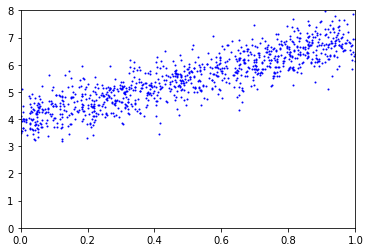

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.random.rand(1000)
y = 4 + 3*X + .5*np.random.randn(1000)

plt.plot(X, y, 'bo', markersize = 1)
plt.axis([0, 1, 0, 8])
plt.show()

## 2. Find w, b by LR 

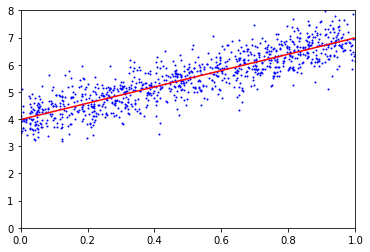

Solution found by LR of sklearn: 3.0064339802991205 3.9829144134627796


In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
w, b = model.coef_[0][0], model.intercept_[0]

x0 = np.linspace(start = -.05, stop = 1.05, num = 20)
y0 = w*x0 + b


plt.plot(X, y, 'bo', markersize = 1)
plt.axis([0, 1, 0, 8])
plt.plot(x0, y0, 'r')
plt.show()

print('Solution found by LR of sklearn:', w, b)

## 3. Find w, b by GD

In [3]:
def grad(w, Xbar):
    N = Xbar.shape[0]
    return  1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w, Xbar):
    N = Xbar.shape[0]
    return 0.5/N * np.linalg.norm(y - Xbar.T.dot(w))**2

def GD(w_init, eta, Xbar):
    w = [w_init]
    for it in range(1000):
        w_new = w[-1] - eta*grad(w[-1], Xbar)
        if np.linalg.norm(grad(w_new, Xbar))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return (w, it)

def draw(X0, Y0, w1, ids, nrows = 2, ncols = 4):
    width = 3*ncols
    height = 3*nrows

    plt.close('all')
    fig,axs=plt.subplots(nrows, ncols, figsize=(width, height))
    
    for i, k in enumerate(ids):
        r = i//ncols
        c = i%ncols

        b = w1[ids[i]][0]
        w = w1[ids[i]][1]
        x = np.linspace(start = 0, stop = 1, num = 20)
        y = w*x +b
        str0 = 'iter={}/{},w={:.2f},b={:.2f}'.format(ids[i], len(w1) - 1, b, w)
        if nrows > 1:
            axs[r, c].plot(X0, Y0, 'bo', markersize = .5)
            axs[r, c].set_xlabel(str0)
            axs[r, c].plot(x, y, 'r')
            axs[r, c].axis([0, 1, 0, 8])
            axs[r, c].plot()
            axs[r, c].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        else:
            axs[c].plot(X0, Y0, 'bo', markersize = .5)
            axs[c].set_xlabel(str0)
            axs[c].plot(x, y, 'r')
            axs[c].axis([0, 1, 0, 8])
            axs[c].plot()
            axs[r, c].tick_params(axis = 'both', which = 'major', labelsize = 13)

    plt.show()

### leanring rate 0.1 start = [1,1]

In [4]:
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X.reshape(-1, 1)), axis = 1)

w_init = np.array([1, 1])
w1, it1 = GD(w_init, .1, Xbar)
it1

371

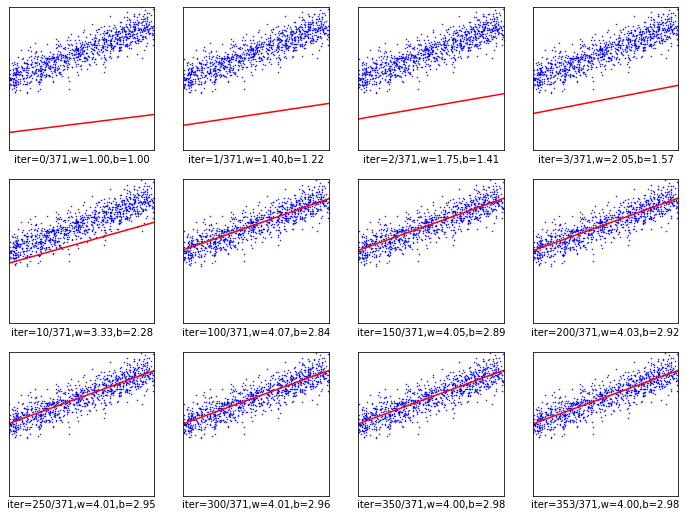

In [5]:
ids = [0, 1, 2, 3, 10, 100, 150, 200, 250, 300, 350, 353]
draw(X, y, w1, ids, 3, 4)

### learning rate = 1, start = [1,1]

In [6]:
w_init = np.array([1, 1])
w2, it2 = GD(w_init, 1, Xbar)
it2

36

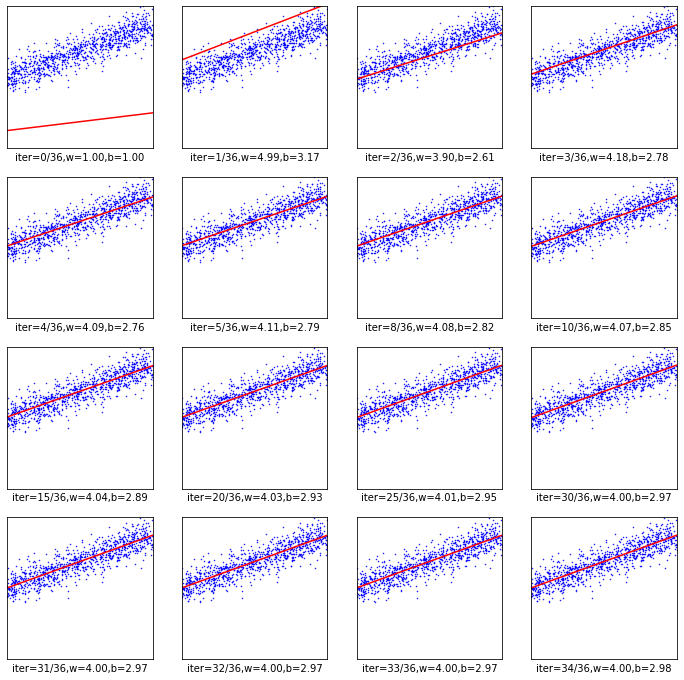

In [7]:
ids = [0, 1, 2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 31, 32, 33, 34]
draw(X, y, w2, ids, 4, 4)